# Summary Statistics of Entire Dataset

In [10]:
import pandas as pd

import sqlalchemy as sa
from sqlalchemy import text

In [2]:
# read db connection from .env file
from helpers.settings import get_settings

settings = get_settings()

Loading settings ...


In [5]:
engine = sa.create_engine(settings.postgresql_dsn.__str__())

In [19]:
with engine.connect() as conn:
    res = conn.execute(
        text(
            """
    SELECT COUNT(individual_id) AS num_patients
    FROM individual
    """
        )
    ).scalars().all()
    print(f"Number of patients: {res[0]}")

    res = conn.execute(
        text(
            """
            SELECT COUNT(variant_id) AS num_variants
            FROM variant_view_mv v
            WHERE provenance @> jsonb_build_array(jsonb_build_object('dataset_id', 2))
            """
        )
    ).scalars().all()

    print(f"Number of variants: {res[0]}")

Number of patients: 1347
Number of variants: 392


In [20]:
# get number of male / female patients
individuals_mv = pd.read_sql_table("individuals_mv", engine)
individuals_mv.head()

,individual_id,individual_sex_id,sex,zygosity_id,zygosity,variant_inheritance_id,variant_inheritance,publication_id,publication_title,publication_year,...,p_pos_start,p_pos_end,p_start_aa,p_end_aa,p_edit_ref,p_edit_alt,p_hgvs_string,exon_start,exon_end,structure_domains
0,1,NaN,None,1.0,heterozygous,1.0,inherited,1,Familial Evaluation in Catecholaminergic Polym...,2012,...,NaN,NaN,None,None,None,None,None,NaN,NaN,None
1,2,2.0,female,NaN,None,NaN,None,2,Flecainide therapy reduces exercise-induced ve...,2011,...,4962.0,4963.0,Y,Y,,C,NP_001026.2:p.(Tyr4962Cys),105.0,106.0,"[{'structure_id': 19, 'structure_domain': 'Act..."
2,3,1.0,male,NaN,None,NaN,None,3,Structural abnormalities on cardiac magnetic r...,2020,...,4725.0,4726.0,Y,Y,,N,NP_001026.2:p.(Tyr4725Asn),99.0,100.0,"[{'structure_id': 23, 'structure_domain': 'Tra..."
3,4,2.0,female,1.0,heterozygous,NaN,None,4,Genetic Background of Catecholaminergic Polymo...,2013,...,4725.0,4726.0,Y,Y,,C,NP_001026.2:p.(Tyr4725Cys),99.0,100.0,"[{'structure_id': 25, 'structure_domain': 'Pse..."
4,5,1.0,male,NaN,None,2.0,spontaneous,5,Gender differences in the inheritance mode of ...,2015,...,4725.0,4726.0,Y,Y,,C,NP_001026.2:p.(Tyr4725Cys),99.0,100.0,"[{'structure_id': 25, 'structure_domain': 'Pse..."


<Axes: xlabel='sex'>

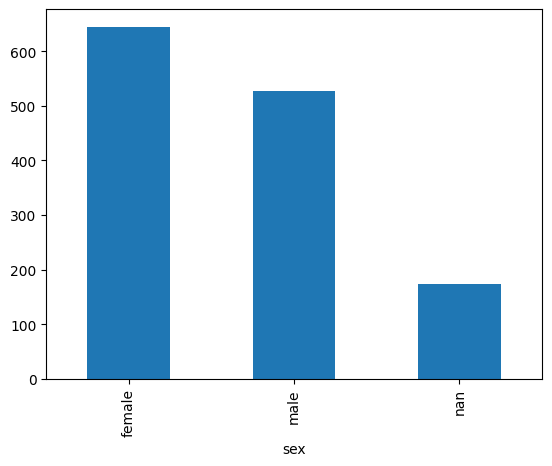

In [25]:
individuals_mv.value_counts("sex", dropna=False).plot(kind="bar")